In [41]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_data(root='data/CroppedYaleB', reduce=4):
    """ 
    Load ORL (or Extended YaleB) dataset to numpy array.
    
    Args:
        root: path to dataset.
        reduce: scale factor for zooming out images.
        
    """ 
    images, labels = [], []

    for i, person in enumerate(sorted(os.listdir(root))):
        
        if not os.path.isdir(os.path.join(root, person)):
            continue
        
        for fname in os.listdir(os.path.join(root, person)):    
            
            # Remove background images in Extended YaleB dataset.
            if fname.endswith('Ambient.pgm'):
                continue
            
            if not fname.endswith('.pgm'):
                continue
                
            # load image.
            img = Image.open(os.path.join(root, person, fname))
            img = img.convert('L') # grey image.

            # reduce computation complexity.
            img = img.resize([s//reduce for s in img.size])

            # TODO: preprocessing.

            # convert image to numpy array.
            img = np.asarray(img).reshape((-1,1))

            # collect data and label.
            images.append(img)
            labels.append(i)

    # concate all images and labels.
    images = np.concatenate(images, axis=1)
    labels = np.array(labels)

    return images, labels

In [85]:
def add_block_occlusion(image, bsize=(4,4), dims=None, seed=1):
    to_return = image.copy()
    np.random.seed(seed)
    if dims==None and np.sqrt(len(to_return)) != int(np.sqrt(len(to_return))):
        raise ValueError("Image isn't square and dims are not provided. Can't detect size")
    elif dims==None:
        dim = int(np.sqrt(len(image)))
        dims = (dim,dim)
        
    to_return = to_return.reshape(dims[0], dims[1])
    xpoint = np.random.choice(range(dims[0] - 4), 1)[0]
    ypoint = np.random.choice(range(dims[1] - 4), 1)[0]
    
    for x in range(xpoint, xpoint+bsize[0]):
        for y in range(ypoint, ypoint+bsize[0]):
            to_return[x,y] = 255
    
    return to_return

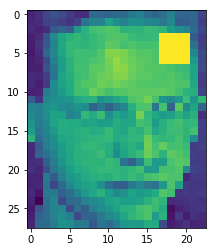

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
image = images[:,9]
plt.imshow(add_block_occlusion(image, dims=(28,23), seed=8))